##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

#Space 

In [ ]:
## Taking the news text from space.com and print

page = requests.get("https://www.space.com/")
soup = BeautifulSoup(page.content , 'html.parser')

space_news = []
#find all tag in the soup.
heading = soup.find_all("h3")

#...ptonic organization!
n=len(heading)
for x in range(n): 
    #print(str.strip(heading[x].text))
    space_news.append(str.strip(heading[x].text))
print(space_news)


['Europe will launch a new two-handed robotic arm to the International Space Station soon', "New NASA chief Bill Nelson brings a politician's eye to space agency", "Tropical Storm Elsa delays SpaceX Dragon cargo ship's return to Earth", "NASA's Mars helicopter Ingenuity sails through 9th flight on the Red Planet", 'Enormous Antarctic lake vanishes in 3 days', "On This Day in Space! July 6, 1938: Discovery of Jupiter's moon Lysithea", 'Europe will launch a new two-handed robotic arm to the International Space Station soon', "NASA's Perseverance rover is taking its own wheel for Mars drives", "On This Day in Space! July 6, 1938: Discovery of Jupiter's moon Lysithea", "New exhibit tells 'stranger than fiction' tale of aerospace medicine", 'Enormous Antarctic lake vanishes in 3 days', 'Pictures from space! Our image of the day', "Europe's ExoMars parachute still experiencing problems in drop test", 'Mars methane mystery may be starting to clear up', "Up in the air! US government's UFO repo

### Taking data from first website

In [ ]:
news = []
web = []
counter = 0

page = requests.get("https://www.space.com/")
soup1 = BeautifulSoup(page.content , 'html.parser')

for link in soup1.find_all('a'):
    #rint(link.get('href'))
    if counter == 20:
        break
    url = link.get('href')
    counter += 1
    if url != "#main":
        page = requests.get(url)
        soup = BeautifulSoup(page.content , 'html.parser')

        #find all tag in the soup.
        heading = soup.find_all("h3")

        #...ptonic organization!
        n=len(heading)
        for x in range(n): 
             #print(str.strip(heading[x].text))
            news.append(str.strip(heading[x].text))
            web.append(url)
print(len(news))

240


### Take another website

In [ ]:
page2 = requests.get("https://scitechdaily.com/news/space/amp/")
#page2 = requests.get("https://astronomy.com/news")

soup2 = BeautifulSoup(page2.content , 'html.parser')

counter = 0

#get all the href links
for link in soup2.find_all('a'):
    if counter == 100:
        break
    url = link.get('href')
    
    counter += 1

    if url[0:4] == "http":
        page = requests.get(url)
        soup = BeautifulSoup(page.content , 'html.parser')

        #find all tag in the soup.
        heading = soup.find_all("a")

        #...ptonic organization!
        n=len(heading)
        for x in range(n):
            if(len(heading[x].text)>20):
              news.append(str.strip(heading[x].text))
              web.append(url)
print(len(news))

2032


In [ ]:
print(len(web))

2032


In [ ]:
df_space = pd.DataFrame({
    "Article": news,})

In [ ]:
df_space

Article
0     Europe will launch a new two-handed robotic ar...
1     New NASA chief Bill Nelson brings a politician...
2     Tropical Storm Elsa delays SpaceX Dragon cargo...
3     NASA's Mars helicopter Ingenuity sails through...
4            Enormous Antarctic lake vanishes in 3 days
...                                                 ...
2027  Smart Spacewalker: European Robotic Arm (ERA) ...
2028  Essential Amino Acids: Why Wild African Fruits...
2029  MIT Physicists Find New Clues to Why There’s S...
2030  Viruses Are the Most Common Cause of Myocardit...
2031  Experiment Shows Vertical Greenery Can Act as ...

[2032 rows x 1 columns]

### World Cloud

In [ ]:
# Using wordcloud to visually represent the text data
def make_wordcloud(corpus, color = 'black'):
    """
    A function to create a word cloud from a corpus of words
    """
    
    words = ' '.join(corpus)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    return wordcloud

Text(0.5, 1.0, 'Space News')

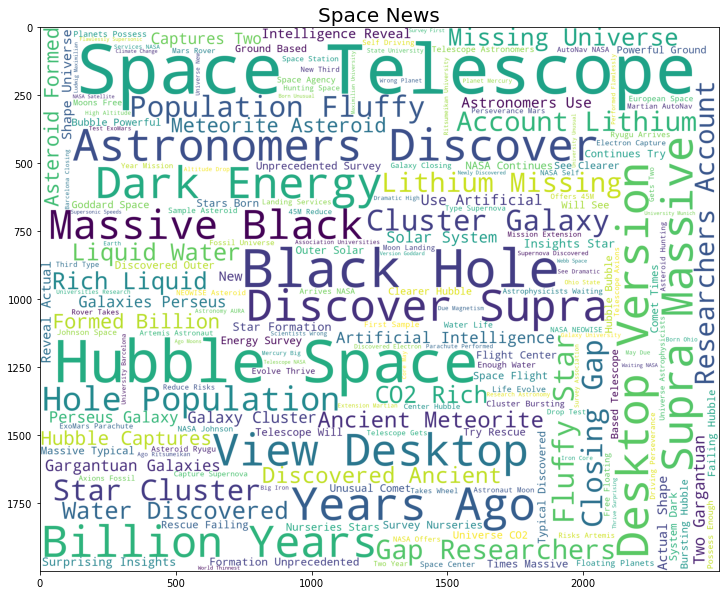

In [ ]:
news_wordcloud = make_wordcloud(df_space['Article'],'white')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
axes.imshow(news_wordcloud)
axes.set_title("Space News",fontdict={"fontsize":20})


#CryptoCurrency

In [ ]:
URLS = ["https://en.wikipedia.org/wiki/Cryptocurrency",
       "https://en.wikipedia.org/wiki/History_of_bitcoin",
       "https://en.wikipedia.org/wiki/Cryptocurrency_exchange",
       "https://en.wikipedia.org/wiki/Litecoin",
       "https://en.wikipedia.org/wiki/Bitcoin_Cash",
       "https://en.wikipedia.org/wiki/Ethereum",
       "https://en.wikipedia.org/wiki/Ripple_(payment_protocol)",
       "https://en.wikipedia.org/wiki/Dogecoin",
       "https://en.wikipedia.org/wiki/Monero",
       "https://en.wikipedia.org/wiki/Ethereum_Classic",
       "https://en.wikipedia.org/wiki/Bitcoin_Gold",
       "https://en.wikipedia.org/wiki/Cardano_(blockchain_platform)",
       "https://en.wikipedia.org/wiki/Dash_(cryptocurrency)"
       ]

In [ ]:
DATA = []
for url in URLS:
  page = requests.get(url)
  soup = BeautifulSoup(page.content,'html.parser')
  content = soup.find_all('p')
  n = len(content)
  for x in range(n):
    DATA.append(str.strip(content[x].text))

In [ ]:
df_crypto = pd.DataFrame(DATA,columns=['Article'])
df_crypto['Category'] = 'CryptoCurrency'
# df_crypto['Title'] = np.nan

In [ ]:
df_crypto = pd.DataFrame({'Article':DATA})
df_crypto

Article
0                                                     
1                                                     
2    A cryptocurrency, crypto-currency, or crypto i...
3    Bitcoin, first released as open-source softwar...
4    In 1983, the American cryptographer David Chau...
..                                                 ...
425  The system's decentralization has been critici...
426  As of 2018 coins were mined using a proof of w...
427  Masternodes provide two additional kinds of tr...
428                                                   
429  The Dash DAO uses the 10% it receives from min...

[430 rows x 1 columns]

In [ ]:
df_crypto['Article'].replace('',np.nan,inplace=True)
df_crypto.dropna(subset=['Article'],inplace=True)
df_crypto.reset_index(inplace=True)
df_crypto = df_crypto.drop(['index'],axis=1)

In [ ]:
df_crypto

Article
0    A cryptocurrency, crypto-currency, or crypto i...
1    Bitcoin, first released as open-source softwar...
2    In 1983, the American cryptographer David Chau...
3    In 1996, the National Security Agency publishe...
4    In 1998, Wei Dai published a description of "b...
..                                                 ...
409  A proof of service protocol ensures that maste...
410  The system's decentralization has been critici...
411  As of 2018 coins were mined using a proof of w...
412  Masternodes provide two additional kinds of tr...
413  The Dash DAO uses the 10% it receives from min...

[414 rows x 1 columns]

##WordCloud

In [ ]:
# Using wordcloud to visually represent the text data
def make_wordcloud(corpus, color = 'black'):
    """
    A function to create a word cloud from a corpus of words
    """
    
    words = ' '.join(corpus)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    return wordcloud

Text(0.5, 1.0, 'CryptoCurrency')

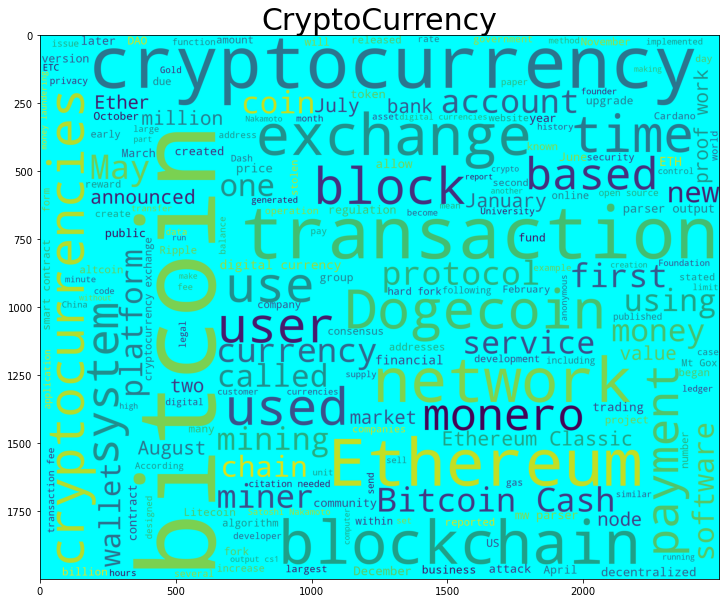

In [ ]:
crypto_wordcloud = make_wordcloud(df_crypto['Article'], 'cyan')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
axes.imshow(crypto_wordcloud)
axes.set_title("CryptoCurrency",fontdict={"fontsize":30})

#Electric Vehicle

In [ ]:
news = []
web = []
counter = 0
for link in soup.find_all("p"):
    #rint(link.get('href'))
    if counter == 20:
        break
    url = link.get('href')
    counter += 1
    if url != "#main":
        page = requests.get("https://en.wikipedia.org/wiki/Electric_vehicle")
    soup = BeautifulSoup(page.content , 'html.parser')

    #find all tag in the soup.
    heading = soup.find_all("p")

    #...ptonic organization!
    n=len(heading)
    for x in range(1,n): 
        #print(str.strip(heading[x].text))
        news.append(str.strip(heading[x].text))
        web = 'https://en.wikipedia.org/wiki/Electric_vehicle'
print(len(news))

1694


In [ ]:
df_ev = pd.DataFrame({
    "Article": news,})

In [ ]:
df_ev

Article
0     An electric vehicle (EV) is a vehicle that use...
1     EVs first came into existence in the mid-19th ...
2     Commonly, the term EV is used to refer to an e...
3     Government incentives to increase adoption wer...
4     Electric motive power started in 1827, when Hu...
...                                                 ...
1689  Larger electric trucks have been made in the 2...
1690  Fuso, a division of Daimler, began deliveries ...
1691  Renault and Volvo hoped to launch their first ...
1692  Particularly in Europe, fuel-cell electric tra...
1693  With the increase in number of the electric ve...

[1694 rows x 1 columns]

##WordCloud

In [ ]:
# Using wordcloud to visually represent the text data
def make_wordcloud(corpus, color = 'black'):
    """
    A function to create a word cloud from a corpus of words
    """
    
    words = ' '.join(corpus)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    return wordcloud

Text(0.5, 1.0, 'Electric Vehicle')

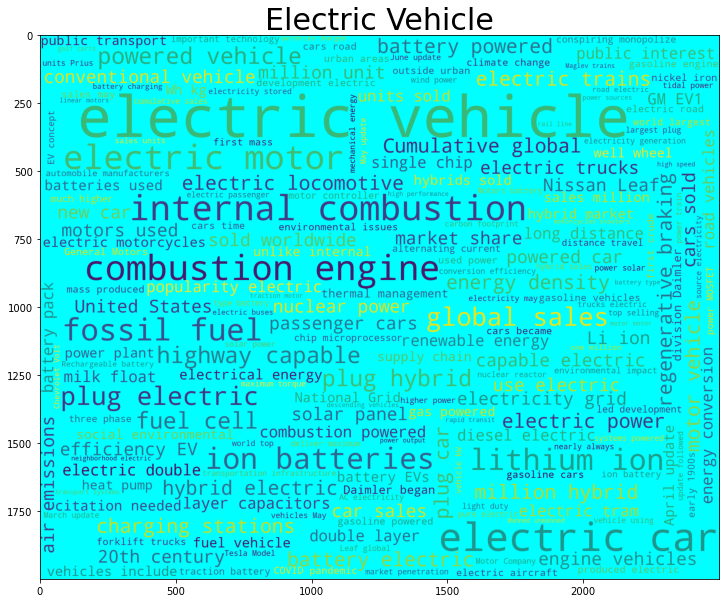

In [ ]:
ev_wordcloud = make_wordcloud(df_ev['Article'], 'cyan')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
axes.imshow(ev_wordcloud)
axes.set_title("Electric Vehicle",fontdict={"fontsize":30})

#Combaining all the DataFrames

In [ ]:
df = pd.concat([df_space,df_crypto,df_ev])

In [ ]:
df

Article
0     Europe will launch a new two-handed robotic ar...
1     New NASA chief Bill Nelson brings a politician...
2     Tropical Storm Elsa delays SpaceX Dragon cargo...
3     NASA's Mars helicopter Ingenuity sails through...
4            Enormous Antarctic lake vanishes in 3 days
...                                                 ...
1689  Larger electric trucks have been made in the 2...
1690  Fuso, a division of Daimler, began deliveries ...
1691  Renault and Volvo hoped to launch their first ...
1692  Particularly in Europe, fuel-cell electric tra...
1693  With the increase in number of the electric ve...

[4140 rows x 1 columns]

In [ ]:
!pip install pycaret

In [ ]:
df = [Article.strip() for Article in df.Article]
df = [Article for Article in df if Article] 
df[0:10]

['Europe will launch a new two-handed robotic arm to the International Space Station soon',
 "New NASA chief Bill Nelson brings a politician's eye to space agency",
 "Tropical Storm Elsa delays SpaceX Dragon cargo ship's return to Earth",
 "NASA's Mars helicopter Ingenuity sails through 9th flight on the Red Planet",
 'Enormous Antarctic lake vanishes in 3 days',
 "On This Day in Space! July 6, 1938: Discovery of Jupiter's moon Lysithea",
 'Europe will launch a new two-handed robotic arm to the International Space Station soon',
 "NASA's Perseverance rover is taking its own wheel for Mars drives",
 "On This Day in Space! July 6, 1938: Discovery of Jupiter's moon Lysithea",
 "New exhibit tells 'stranger than fiction' tale of aerospace medicine"]

In [ ]:
df_text = ' '.join(df)
df_text 

'Europe will launch a new two-handed robotic arm to the International Space Station soon New NASA chief Bill Nelson brings a politician\'s eye to space agency Tropical Storm Elsa delays SpaceX Dragon cargo ship\'s return to Earth NASA\'s Mars helicopter Ingenuity sails through 9th flight on the Red Planet Enormous Antarctic lake vanishes in 3 days On This Day in Space! July 6, 1938: Discovery of Jupiter\'s moon Lysithea Europe will launch a new two-handed robotic arm to the International Space Station soon NASA\'s Perseverance rover is taking its own wheel for Mars drives On This Day in Space! July 6, 1938: Discovery of Jupiter\'s moon Lysithea New exhibit tells \'stranger than fiction\' tale of aerospace medicine Enormous Antarctic lake vanishes in 3 days Pictures from space! Our image of the day Europe\'s ExoMars parachute still experiencing problems in drop test Mars methane mystery may be starting to clear up Up in the air! US government\'s UFO report stirs range of reactions Best 

In [ ]:
import string
no_punc_df = df_text.translate(str.maketrans('', '', string.punctuation))
no_punc_df

'Europe will launch a new twohanded robotic arm to the International Space Station soon New NASA chief Bill Nelson brings a politicians eye to space agency Tropical Storm Elsa delays SpaceX Dragon cargo ships return to Earth NASAs Mars helicopter Ingenuity sails through 9th flight on the Red Planet Enormous Antarctic lake vanishes in 3 days On This Day in Space July 6 1938 Discovery of Jupiters moon Lysithea Europe will launch a new twohanded robotic arm to the International Space Station soon NASAs Perseverance rover is taking its own wheel for Mars drives On This Day in Space July 6 1938 Discovery of Jupiters moon Lysithea New exhibit tells stranger than fiction tale of aerospace medicine Enormous Antarctic lake vanishes in 3 days Pictures from space Our image of the day Europes ExoMars parachute still experiencing problems in drop test Mars methane mystery may be starting to clear up Up in the air US governments UFO report stirs range of reactions Best night sky events of July 2021 

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_tokens = word_tokenize(no_punc_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(df_tokens) 

['Europe', 'will', 'launch', 'a', 'new', 'twohanded', 'robotic', 'arm', 'to', 'the', 'International', 'Space', 'Station', 'soon', 'New', 'NASA', 'chief', 'Bill', 'Nelson', 'brings', 'a', 'politicians', 'eye', 'to', 'space', 'agency', 'Tropical', 'Storm', 'Elsa', 'delays', 'SpaceX', 'Dragon', 'cargo', 'ships', 'return', 'to', 'Earth', 'NASAs', 'Mars', 'helicopter', 'Ingenuity', 'sails', 'through', '9th', 'flight', 'on', 'the', 'Red', 'Planet', 'Enormous', 'Antarctic', 'lake', 'vanishes', 'in', '3', 'days', 'On', 'This', 'Day', 'in', 'Space', 'July', '6', '1938', 'Discovery', 'of', 'Jupiters', 'moon', 'Lysithea', 'Europe', 'will', 'launch', 'a', 'new', 'twohanded', 'robotic', 'arm', 'to', 'the', 'International', 'Space', 'Station', 'soon', 'NASAs', 'Perseverance', 'rover', 'is', 'taking', 'its', 'own', 'wheel', 'for', 'Mars', 'drives', 'On', 'This', 'Day', 'in', 'Space', 'July', '6', '1938', 'Discovery', 'of', 'Jupiters', 'moon', 'Lysithea', 'New', 'exhibit', 'tells', 'stranger', 'than',

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in df_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40]) 

['Europe', 'launch', 'new', 'twohanded', 'robotic', 'arm', 'International', 'Space', 'Station', 'soon', 'New', 'NASA', 'chief', 'Bill', 'Nelson', 'brings', 'politicians', 'eye', 'space', 'agency', 'Tropical', 'Storm', 'Elsa', 'delays', 'SpaceX', 'Dragon', 'cargo', 'ships', 'return', 'Earth', 'NASAs', 'Mars', 'helicopter', 'Ingenuity', 'sails', '9th', 'flight', 'Red', 'Planet', 'Enormous']


In [ ]:
lower_words = [Article.lower() for Article in no_stop_tokens]
print(lower_words[0:25]) 

['europe', 'launch', 'new', 'twohanded', 'robotic', 'arm', 'international', 'space', 'station', 'soon', 'new', 'nasa', 'chief', 'bill', 'nelson', 'brings', 'politicians', 'eye', 'space', 'agency', 'tropical', 'storm', 'elsa', 'delays', 'spacex']


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40]) 

['europ', 'launch', 'new', 'twohand', 'robot', 'arm', 'intern', 'space', 'station', 'soon', 'new', 'nasa', 'chief', 'bill', 'nelson', 'bring', 'politician', 'eye', 'space', 'agenc', 'tropic', 'storm', 'elsa', 'delay', 'spacex', 'dragon', 'cargo', 'ship', 'return', 'earth', 'nasa', 'mar', 'helicopt', 'ingenu', 'sail', '9th', 'flight', 'red', 'planet', 'enorm']


In [ ]:
import gensim 
from gensim import corpora 

In [ ]:
dataset = [d.split() for d in lower_words]

In [ ]:
import string
import re
dictionary = corpora.Dictionary(dataset)
term_matrix = [dictionary.doc2bow(rev) for rev in dataset]

In [ ]:
LDA = gensim.models.ldamodel.LdaModel

In [ ]:
lda_model = LDA(corpus=term_matrix,id2word=dictionary,num_topics=5,random_state=100,chunksize=1000,passes=50,iterations=100)
lda_model.print_topics()

[(0,
  '0.069*"vehicles" + 0.051*"vehicle" + 0.039*"power" + 0.036*"battery" + 0.035*"energy" + 0.033*"batteries" + 0.031*"evs" + 0.028*"cars" + 0.020*"motor" + 0.019*"ev"'),
 (1,
  '0.141*"electric" + 0.039*"in" + 0.023*"used" + 0.020*"also" + 0.015*"emissions" + 0.012*"production" + 0.012*"heat" + 0.011*"however" + 0.011*"engines" + 0.010*"efficiency"'),
 (2,
  '0.020*"combustion" + 0.018*"system" + 0.016*"plugin" + 0.015*"internal" + 0.015*"one" + 0.014*"sold" + 0.013*"market" + 0.013*"this" + 0.012*"a" + 0.012*"fossil"'),
 (3,
  '0.039*"electricity" + 0.012*"need" + 0.012*"global" + 0.011*"trains" + 0.011*"air" + 0.010*"grid" + 0.010*"units" + 0.009*"cell" + 0.008*"charge" + 0.007*"hybrids"'),
 (4,
  '0.034*"the" + 0.020*"charging" + 0.020*"use" + 0.016*"hybrid" + 0.015*"fuel" + 0.015*"may" + 0.014*"first" + 0.012*"public" + 0.011*"incentives" + 0.010*"could"')]

In [ ]:
Topics = lda_model.show_topics()
Topics

[(0,
  '0.069*"vehicles" + 0.051*"vehicle" + 0.039*"power" + 0.036*"battery" + 0.035*"energy" + 0.033*"batteries" + 0.031*"evs" + 0.028*"cars" + 0.020*"motor" + 0.019*"ev"'),
 (1,
  '0.141*"electric" + 0.039*"in" + 0.023*"used" + 0.020*"also" + 0.015*"emissions" + 0.012*"production" + 0.012*"heat" + 0.011*"however" + 0.011*"engines" + 0.010*"efficiency"'),
 (2,
  '0.020*"combustion" + 0.018*"system" + 0.016*"plugin" + 0.015*"internal" + 0.015*"one" + 0.014*"sold" + 0.013*"market" + 0.013*"this" + 0.012*"a" + 0.012*"fossil"'),
 (3,
  '0.039*"electricity" + 0.012*"need" + 0.012*"global" + 0.011*"trains" + 0.011*"air" + 0.010*"grid" + 0.010*"units" + 0.009*"cell" + 0.008*"charge" + 0.007*"hybrids"'),
 (4,
  '0.034*"the" + 0.020*"charging" + 0.020*"use" + 0.016*"hybrid" + 0.015*"fuel" + 0.015*"may" + 0.014*"first" + 0.012*"public" + 0.011*"incentives" + 0.010*"could"')]

In [ ]:
Topics[0] = ''

(0,
 '0.110*"electric" + 0.048*"vehicle" + 0.033*"power" + 0.033*"battery" + 0.030*"batteries" + 0.029*"EVs" + 0.028*"energy" + 0.027*"cars" + 0.018*"EV" + 0.016*"Electric"')

In [ ]:
dataset1 = [d.split() for d in df]

dictionary1 = corpora.Dictionary(dataset1)
term_matrix1 = [dictionary.doc2bow(rev) for rev in dataset1]

lda_model1 = LDA(corpus=term_matrix1,id2word=dictionary1,num_topics=5,random_state=100,chunksize=1000,passes=50,iterations=100)
lda_model1.print_topics()

[(0,
  '0.033*"Examples" + 0.012*"MakerDAO" + 0.011*"Leading" + 0.010*"starting" + 0.009*""alternative" + 0.009*"synthetic" + 0.009*"Space.com" + 0.009*"Ethereum-based" + 0.007*"Barclays," + 0.006*"Solving"'),
 (1,
  '0.016*"View" + 0.015*"its" + 0.013*"Critical" + 0.012*"Individual" + 0.011*"but" + 0.010*"Crab" + 0.010*"new" + 0.010*"Electron" + 0.009*"Exotic" + 0.009*"Never"'),
 (2,
  '0.025*"Media" + 0.021*"Dot" + 0.020*"new" + 0.018*"farthest" + 0.016*"It" + 0.014*"Crab" + 0.010*"Ridge" + 0.010*"Quantum" + 0.009*"the" + 0.008*"binoculars"'),
 (3,
  '0.034*"Pratt" + 0.010*"Examples" + 0.007*"parachute" + 0.007*"hashing.[93]" + 0.007*"rule"," + 0.007*"Maduro" + 0.006*"transactions" + 0.006*"Two" + 0.006*"Mediterranean" + 0.006*"Node"'),
 (4,
  '0.021*"Examples" + 0.019*"Naor" + 0.017*"Ethereum-based" + 0.013*"tokens." + 0.012*"inflation" + 0.011*"spent" + 0.011*"alternative" + 0.011*"prototype).[84]" + 0.010*"Track" + 0.009*"Potential"')]